In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

plt.style.use("seaborn")
colors = sns.color_palette("muted", 10)
# sns.set(font='NanumBarunGothic', font_scale=1.5)

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

/tmp/ipykernel_66/321186432.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
df_train = pd.read_csv("./datasets/train.csv")
df_train['video_path'] = df_train['video_path'].apply(lambda x: x.replace('./train/', './datasets/train/'))

df_test = pd.read_csv("./datasets/test.csv")
df_test['video_path'] = df_test['video_path'].apply(lambda x: x.replace('./test/', './datasets/test/'))

df_train.head()

,sample_id,video_path,label
0,TRAIN_0000,./datasets/train/TRAIN_0000.mp4,7
1,TRAIN_0001,./datasets/train/TRAIN_0001.mp4,7
2,TRAIN_0002,./datasets/train/TRAIN_0002.mp4,0
3,TRAIN_0003,./datasets/train/TRAIN_0003.mp4,0
4,TRAIN_0004,./datasets/train/TRAIN_0004.mp4,1


<AxesSubplot: >

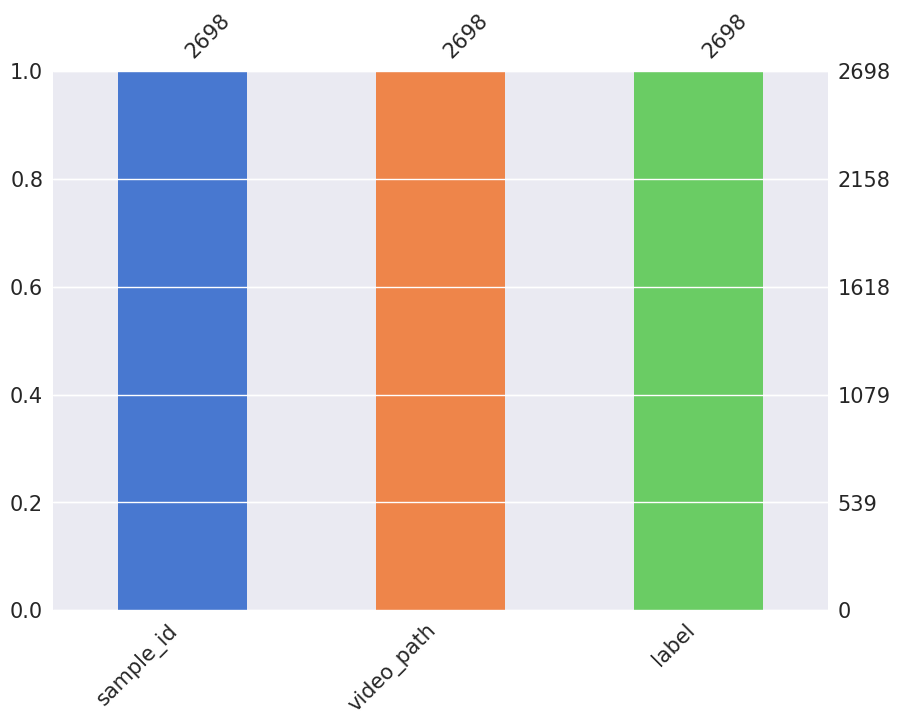

In [3]:
# 결측치 확인
msno.bar(df_train, figsize=(10,7), fontsize=15, color=colors)

## 각 라벨 당 데이터

In [4]:
df_train["label"].value_counts(dropna=False).sort_index()

0     1783
1      318
2       51
3       78
4       13
5       28
6        3
7      317
8       30
9       34
10       4
11      33
12       6
Name: label, dtype: int64

## C-E-W-T

In [13]:
#라벨 옆에 추가로 각 라벨 당 정보를 적어주자
crash, ego, weather, timing = [], [], [], []

df_train["crash"] = None
df_train["ego"] = None
df_train["weather"] = None
df_train["timing"] = None

#crash
for label in df_train["label"]:
    if label==0:
        crash.append(0) # 충돌 X
    else:
        crash.append(1) # 충돌 O
df_train["crash"] = crash

#ego
for label in df_train["label"]:
    if label==0:
        ego.append(-1)
    elif label<7: 
        ego.append(1) # ego yes
    else: 
        ego.append(0) # ego no
    
#weather
for label in df_train["label"]:
    if label==0:
        weather.append(-1)
    elif label==1 or label==2 or label==7 or label==8:
        weather.append(0) # normal
    elif label==3 or label==4 or label==9 or label==10:
        weather.append(1) # snowy
    else:
        weather.append(2) # rainy

#timing
for label in df_train["label"]:
    if label==0:
        timing.append(-1)
    elif label%2==1:
        timing.append(0) #day
    else:
        timing.append(1) #night

df_train["crash"]=crash
df_train["ego"]=ego
df_train["weather"]=weather
df_train["timing"]=timing

## CE-W-T

In [5]:
#라벨 옆에 추가로 각 라벨 당 정보를 적어주자
crash_ego, weather, timing = [], [], []

df_train["crash_ego"] = None
df_train["weather"] = None
df_train["timing"] = None

#crash & ego
for label in df_train["label"]:
    if label==0:
        crash_ego.append(0) # 충돌 X
    elif label<7:
        crash_ego.append(1) # 충돌 O, 나 O
    else:
        crash_ego.append(2) # 충돌 O, 나 X
df_train["crash_ego"] = crash_ego
    
#weather
for label in df_train["label"]:
    if label==0:
        weather.append(-1)
    elif label==1 or label==2 or label==7 or label==8:
        weather.append(0) # normal
    elif label==3 or label==4 or label==9 or label==10:
        weather.append(1) # snowy
    else:
        weather.append(2) # rainy

#timing
for label in df_train["label"]:
    if label==0:
        timing.append(-1)
    elif label%2==1:
        timing.append(0) #day
    else:
        timing.append(1) #night

df_train["crash_ego"]=crash_ego
df_train["weather"]=weather
df_train["timing"]=timing

## CE-WT

In [6]:
#라벨 옆에 추가로 각 라벨 당 정보를 적어주자
crash_ego, weather_timing = [], []

df_train["crash_ego"] = None
df_train["weather_timing"] = None

#crash & ego
for label in df_train["label"]:
    if label==0:
        crash_ego.append(0) # 충돌 X
    elif label<7:
        crash_ego.append(1) # 충돌 O, 나 O
    else:
        crash_ego.append(2) # 충돌 O, 나 X
df_train["crash_ego"] = crash_ego
    
#weather
for label in df_train["label"]:
    if label==0:
        weather_timing.append(-1)
    elif label==1 or label==7:
        weather_timing.append(0) # Normal, Day
    elif label==2 or label==8:
        weather_timing.append(1) # Normal, Night
    elif label==3 or label==9:
        weather_timing.append(2) # Snowy, Day
    elif label==4 or label==10:
        weather_timing.append(3) # Snowy, Night
    elif label==5 or label==11:
        weather_timing.append(4) # Rainy, Day
    elif label==6 or label==12:
        weather_timing.append(5) # Normal, Night
        

df_train["crash_ego"]=crash_ego
df_train["weather_timing"]=weather_timing

In [7]:
df_train["crash_ego"].value_counts(dropna=False).sort_index()
#crush는 no가 약 2배정도 

0    1783
1     491
2     424
Name: crash_ego, dtype: int64

In [8]:
df_train["weather_timing"].value_counts(dropna=False).sort_index()

-1    1783
 0     635
 1      81
 2     112
 3      17
 4      61
 5       9
Name: weather_timing, dtype: int64

In [9]:
df_train.to_csv(f'./train_multi3.csv', index=False)

In [11]:
df = pd.read_csv('./datasets/train_multi3.csv')
df['video_path'] = df['video_path'].apply(lambda x: x.replace('./train/', './datasets/train/'))
df

,sample_id,video_path,label,crash_ego,weather_timing
0,TRAIN_0000,./datasets/train/TRAIN_0000.mp4,7,2,0
1,TRAIN_0001,./datasets/train/TRAIN_0001.mp4,7,2,0
2,TRAIN_0002,./datasets/train/TRAIN_0002.mp4,0,0,-1
3,TRAIN_0003,./datasets/train/TRAIN_0003.mp4,0,0,-1
4,TRAIN_0004,./datasets/train/TRAIN_0004.mp4,1,1,0
...,...,...,...,...,...
2693,TRAIN_2693,./datasets/train/TRAIN_2693.mp4,3,1,2
2694,TRAIN_2694,./datasets/train/TRAIN_2694.mp4,5,1,4
2695,TRAIN_2695,./datasets/train/TRAIN_2695.mp4,0,0,-1
2696,TRAIN_2696,./datasets/train/TRAIN_2696.mp4,0,0,-1


In [12]:
j = 2698
for i in tqdm(range(len(df))):    
    new_data = {'sample_id': f'TRAIN_{i+j:04}',
                'video_path': f'./datasets/train_aug/TRAIN_{i+j:04}.mp4',
                'label': df['label'][i],
                'crash_ego': df['crash_ego'][i],
                'weather_timing': df['weather_timing'][i],
               }
    df=df.append(new_data, ignore_index=True)

In [13]:
df.to_csv('./train_aug3.csv', index=False)
df

,sample_id,video_path,label,crash_ego,weather_timing
0,TRAIN_0000,./datasets/train/TRAIN_0000.mp4,7,2,0
1,TRAIN_0001,./datasets/train/TRAIN_0001.mp4,7,2,0
2,TRAIN_0002,./datasets/train/TRAIN_0002.mp4,0,0,-1
3,TRAIN_0003,./datasets/train/TRAIN_0003.mp4,0,0,-1
4,TRAIN_0004,./datasets/train/TRAIN_0004.mp4,1,1,0
...,...,...,...,...,...
5391,TRAIN_5391,./datasets/train_aug/TRAIN_5391.mp4,3,1,2
5392,TRAIN_5392,./datasets/train_aug/TRAIN_5392.mp4,5,1,4
5393,TRAIN_5393,./datasets/train_aug/TRAIN_5393.mp4,0,0,-1
5394,TRAIN_5394,./datasets/train_aug/TRAIN_5394.mp4,0,0,-1
